In [1]:
%pylab inline 
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib import gridspec
import scipy.odr # fitting

Populating the interactive namespace from numpy and matplotlib


# Input parameters

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [3]:
h = 0.697    # Hubble:   WMAP 9yr
bhmassmin = 1e6  # BH mass min cut
stmassmin = 1e9  # stellar mass min cut
star_particle_mass = 5.9e5/h
convert_edd_acc = 2.2e-8

# Read data from BT at z=8
Selet Mtotal > mass cut (due to Fig 1)

In [4]:
def read_data_z08( quantity ):
    path = '/new_concatenate_data/finalconcatenatedata/' 
    output = np.load( '../Rockstar_08{0}{1}.npy'.format( path, quantity ) )
    return output

In [5]:
stellarmass = read_data_z08( 'stellarmass' )/h
bhmass      = read_data_z08( 'blackholemass' )/h
bulgemass   = read_data_z08( 'bulgemass_old' )/h

In [6]:
con = (stellarmass>stmassmin)*(bhmass>bhmassmin)*(bulgemass>0)
stellarmass = stellarmass[con]
bhmass = bhmass[con]
bulgemass = bulgemass[con]

print('%d galaxies' %len(bulgemass))

8054 galaxies


# Color palettes and plotting parameters

In [7]:
def get_cmap_sns(color_str):
    my_pa = sns.color_palette(color_str)
    sns.set_palette( my_pa, sns.set_style("white"), sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in"}) )
    my_cmap = ListedColormap(my_pa)
    return my_cmap

In [8]:
my_cmap_greens = get_cmap_sns("Greens")
my_cmap_oranges = get_cmap_sns("Oranges")
my_cmap_blues = get_cmap_sns("Blues")
my_cmap_mm = get_cmap_sns(sns.diverging_palette(145, 280, s=85, l=25, n=7))
my_cmap_ms = get_cmap_sns(sns.diverging_palette(220, 20, n=7))

In [9]:
refercolor = 'silver'
gold_color = 'gold'
green_color = 'limegreen'
line_w=3.0
cbfontsize=16
titlefontsize = 18
labelfontsize = 20
ticksize = 16
annotate = 18

# Fig 1: B/T vs total Mstar

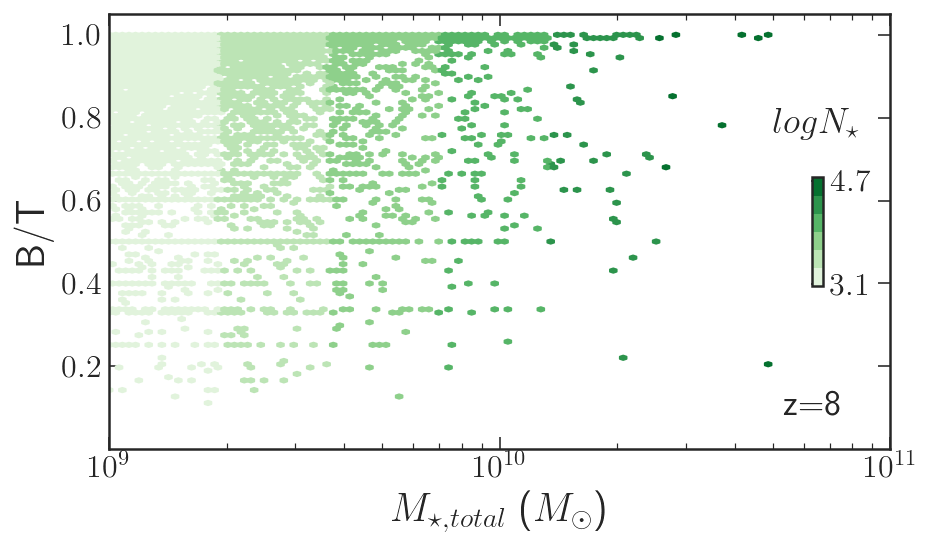

In [10]:
xaxmin = 1e9
xaxmax = 1e11
yaxmin = 0
yaxmax = 1.05

# plot B/T ratio and N_stars
btotratio = bulgemass/stellarmass
n_stars = stellarmass/star_particle_mass
plt.hexbin(stellarmass, btotratio, C=n_stars, cmap=my_cmap_greens, bins='log', xscale='log')
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])

# color bar
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[3.1,4.7] )
cb.ax.tick_params(labelsize=cbfontsize)
plt.annotate( r'$logN_{\star}$', xy=(5e10, 0.75), xytext=(5e10, 0.75), fontsize=annotate)

# title, ticks, labels
plt.xticks([1e9,1e10,1e11], fontsize=ticksize)
plt.yticks([0.2,0.4,0.6,0.8,1.0], fontsize=ticksize)
plt.xlabel( r'$M_{\star, total}$ ($M_{\odot} $)', fontsize=labelfontsize )
plt.ylabel( 'B/T', fontsize=labelfontsize )
plt.title('z=8', fontsize=titlefontsize, x=0.9, y=0.05)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off', labelleft='off')
plt.tick_params( which='major', top='on', right='on' )

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7, 4, forward=True)

savefig('BtoT_Nstar.eps', bbox_inches='tight', format='eps', dpi=2000)

# Fig 4 (top): Mbulge vs Mtotal

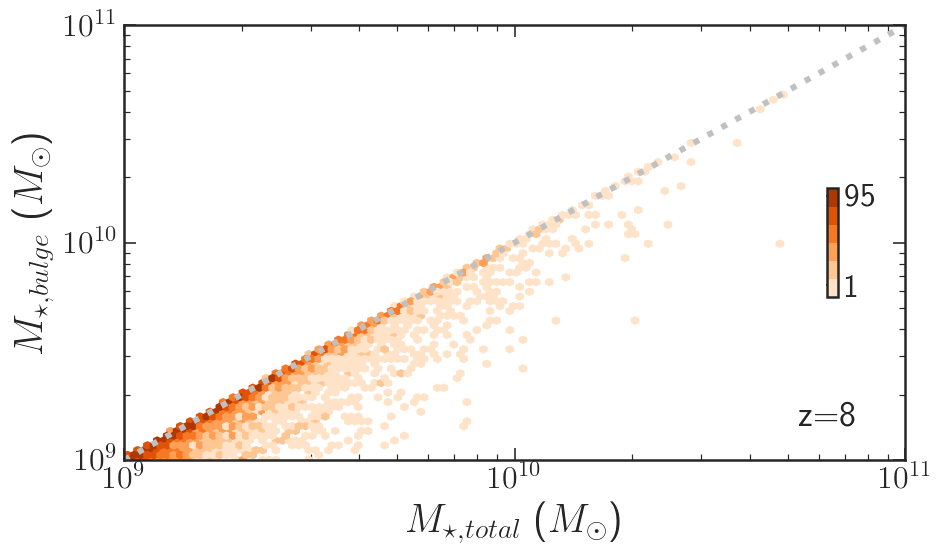

In [11]:
xaxmin = 9    # log scale
xaxmax = 11   # log scale
yaxmin = 9    # log scale
yaxmax = 11   # log scale

plt.hexbin( stellarmass, bulgemass, cmap=my_cmap_oranges, bins='log', xscale='log', yscale='log', mincnt=1 )
plt.axis([ 10**xaxmin, 10**xaxmax, 10**yaxmin, 10**yaxmax ])

# color bar 
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[0.5,2] )
cb.set_ticklabels( ['1','95'] )
cb.ax.tick_params(labelsize=cbfontsize)

# grey dash line
xx = np.logspace( xaxmin, xaxmax )
plot( xx, xx, ':', linewidth=line_w, color=refercolor )

# title, ticks, labels
plt.xticks([1e9,1e10,1e11], fontsize=ticksize)
plt.yticks([1e9,1e10,1e11], fontsize=ticksize)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off', labelleft='off')
plt.tick_params( which='major', top='on', right='on' )
plt.xlabel('$M_{\star,total}$ ($M_{\odot} $)', fontsize=labelfontsize)
plt.ylabel('$M_{\star,bulge}$ ($M_{\odot} $)', fontsize=labelfontsize)
plt.title('z=8', fontsize=titlefontsize, x=0.9, y=0.05)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7, 4, forward=True)

savefig('STMCompareBulgeTotal.eps', bbox_inches='tight', format='eps', dpi=2000)

# Read data from BT at z=8
Selet Mbulge > mass cut

In [12]:
bhmass     = read_data_z08( 'blackholemass' )/h
bulgemass  = read_data_z08( 'bulgemass_old' )/h
hmsigma    = read_data_z08( 'sigmahalfmass' )
bulgesigma = read_data_z08( 'sigmabulgestars' )
stellarmass= read_data_z08( 'stellarmass' )/h

In [13]:
con = (bulgemass>stmassmin)*(bhmass>bhmassmin)
bhmass = bhmass[con]
bulgemass = bulgemass[con]
hmsigma = hmsigma[con]
bulgesigma = bulgesigma[con]

print('%d galaxies' %len(bulgemass))

6680 galaxies


# Fig 4 (bottom): bulge sigma vs half-mass sigma 

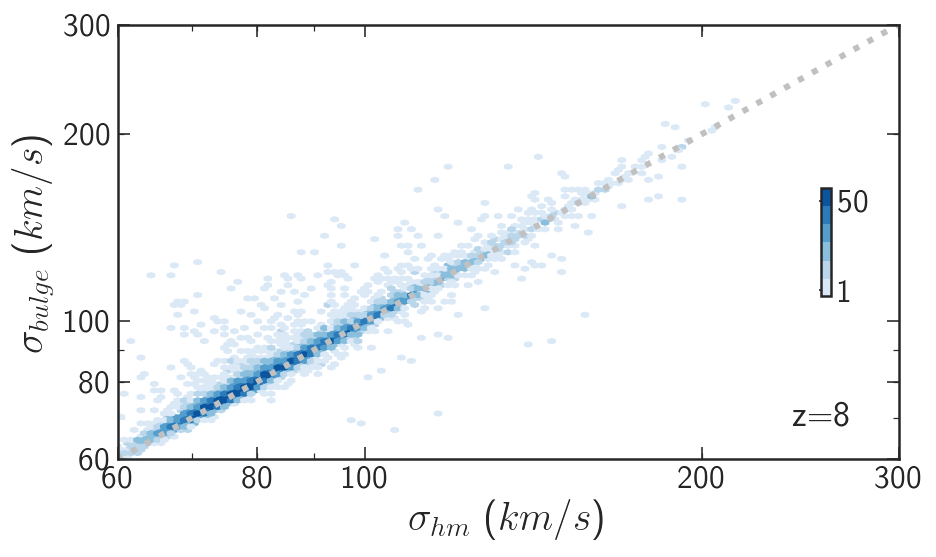

In [14]:
xaxmin = 60
xaxmax = 300
yaxmin = 60
yaxmax = 300

plt.hexbin( hmsigma, bulgesigma, cmap=my_cmap_blues, bins='log', xscale='log', yscale='log', mincnt=1 )
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])

# color bar
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[0.4,1.7] )
cb.set_ticklabels( ['1','50'] )
cb.ax.tick_params(labelsize=cbfontsize)

# grey dash line
xx = np.linspace( xaxmin, xaxmax )
plot( xx, xx, ':', linewidth=line_w, color=refercolor )

# title, ticks, labels
plt.xticks([60,80,100,200,300],[60,80,100,200,300], fontsize=ticksize)
plt.yticks([60,80,100,200,300],[60,80,100,200,300], fontsize=ticksize)
plt.xlabel( '$\sigma_{hm}$ ($km/s$)', fontsize=labelfontsize )
plt.ylabel( '$\sigma_{bulge}$ ($km/s$)', fontsize=labelfontsize )
plt.title('z=8', fontsize=titlefontsize, x=0.9, y=0.05)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off', labelleft='off')
plt.tick_params( which='major', top='on', right='on' )

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7, 4, forward=True)

savefig('SigmaCompareBulgeHalfmass.eps', bbox_inches='tight', format='eps', dpi=2000)

# Read data from BT at z=8
Selet Mtotal > mass cut

In [15]:
stellarmass = read_data_z08( 'stellarmass' )/h
bhmass      = read_data_z08( 'blackholemass' )/h
hmsigma     = read_data_z08( 'sigmahalfmass' )
dtot        = read_data_z08( 'dtotratio' )
bhacc       = read_data_z08( 'accretionrate' )*10.2
gasmass     = read_data_z08( 'gasmass' )/h
sfr         = read_data_z08( 'starformationrate' )

In [16]:
con = (stellarmass>stmassmin)*(bhmass>bhmassmin)
stellarmass = stellarmass[con]
bhmass = bhmass[con]
hmsigma = hmsigma[con]
dtot = dtot[con]
bhacc = bhacc[con]
gasmass = gasmass[con]
sfr = sfr[con]

print('%d galaxies' %len(stellarmass))

8131 galaxies


# Fitting functions

In [17]:
# Model function
def f(B, x):
    return B[0]*x + B[1]

# Fitting function
# x,y: data
# f: fitting model function
# a0,b0: initial guess of a,b
def get_fit(x,y,f,a0,b0):
    linear = scipy.odr.Model(f)
    mydata = scipy.odr.Data(x, y)
    myodr = scipy.odr.ODR(mydata, linear, beta0=[a0, b0])
    return myodr.run()

# Intrinsic scatter calculating function
# x0 is 200. for sigma and 1e11 for stellar mass
# a is the slope, b is the intersection
def get_intrinsic( xi, yi, x0, a, b, intrinsic_guess ):
    
    from scipy.optimize import fsolve
    dof  = len(xi) - 2.
    chi2 = ( yi - (a*xi + b) )**2

    erry = 0.0
    errx = 0.0

    func = lambda intrinsic2 : dof - np.sum( chi2/( intrinsic2 + erry**2 + (a*errx)**2 ) )
    
    intrinsic2 = fsolve(func, intrinsic_guess**2)
    intrinsic2 = np.abs(intrinsic2)
    
    return np.sqrt(intrinsic2)

# above_below: 1 above, 0 below
def get_fit_coeff( con_arr, con_val, above_below, xx, yy, x0 ):
    if above_below == 1 :
        con = con_arr > con_val
    elif above_below == 0 :
        con = con_arr < con_val
    else:
        print('NOOOOOOO: above_below is incorrect...')
    
    con_fit = get_fit( xx[con], yy[con], f, 1., -4. )
    a = con_fit.beta[0]
    b = con_fit.beta[1]
    alpha = b + a*np.log10(x0)
    beta  = a
    scatter = get_intrinsic( xx[con], yy[con], np.log10(x0), a, b, 0.2 )
    
    return alpha, beta, scatter

# Fit overall sample at z=08

In [18]:
main_mm = get_fit( np.log10(stellarmass), np.log10(bhmass), f, 1., -4.)
a_main_mm = main_mm.beta[0]
b_main_mm = main_mm.beta[1]

main_ms = get_fit( np.log10(hmsigma), np.log10(bhmass), f, 1., -4.)
a_main_ms = main_ms.beta[0]
b_main_ms = main_ms.beta[1]

# Fig 6 (top): Mbh vs Mstar with D/T

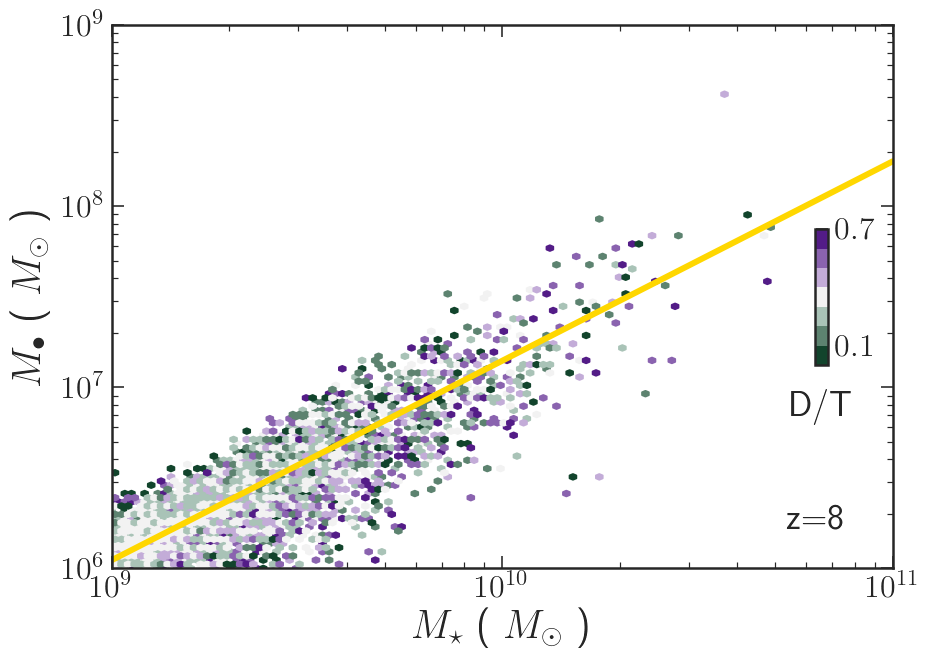

In [19]:
xaxmin = 1e9
xaxmax = 1e11
yaxmin = 1e6
yaxmax = 1e9

plt.hexbin( stellarmass, bhmass, C=dtot, cmap=my_cmap_mm, xscale='log', yscale='log', mincnt=0, vmax=0.7 )
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])

# color bar
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[0.1,0.7] )
cb.ax.tick_params(labelsize=cbfontsize)
plt.annotate( 'D/T',  xy=(5.5e10, 7e6), xytext=(5.5e10, 7e6), fontsize=annotate)

# golden line
xx = np.logspace( np.log10(xaxmin), np.log10(xaxmax) )
plot( xx, ( (10**b_main_mm)*xx**a_main_mm ), '-', color = gold_color, linewidth=line_w )

# title, ticks, labels
plt.xticks([1e9,1e10,1e11], fontsize=ticksize)
plt.yticks([1e6,1e7,1e8,1e9], fontsize=ticksize)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off')
plt.tick_params( which='major', top='on', right='on' )
plt.xlabel( r'$ M_{\star} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.ylabel( r'$ M_{\bullet} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.title('z=8', fontsize=titlefontsize, x=0.9, y=0.05)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7, 5, forward=True)

savefig('BHM_STM_bugledominated.eps', bbox_inches='tight', format='eps', dpi=2000)

# Fig 6 (middle): Mbh vs sigma with D/T

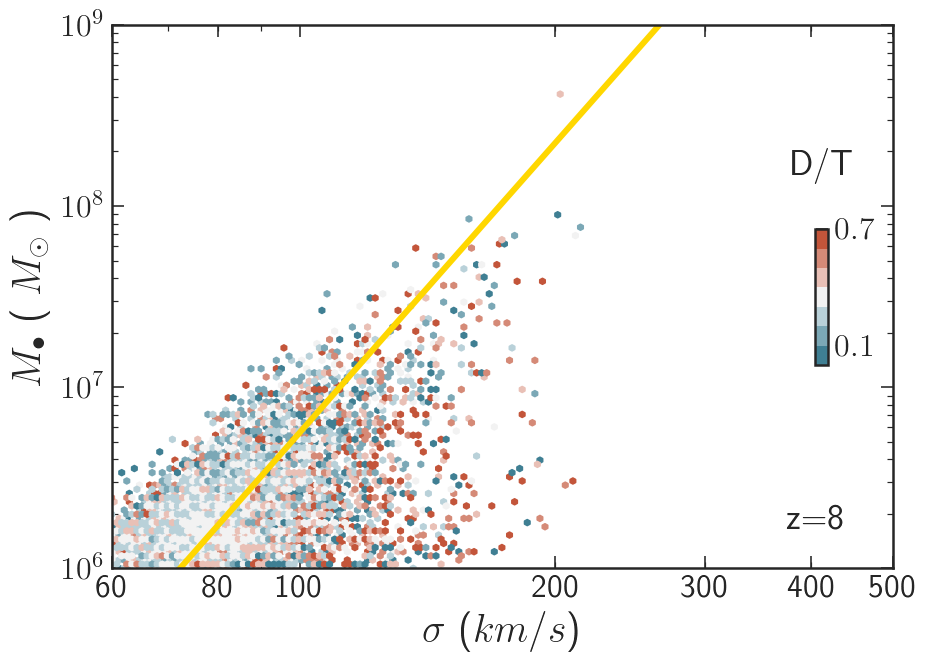

In [20]:
xaxmin = 60
xaxmax = 500
yaxmin = 1e6
yaxmax = 1e9

plt.hexbin( hmsigma, bhmass, C=dtot, cmap=my_cmap_ms, xscale='log', yscale='log', mincnt=0, vmax=0.7 )
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])

# color bar
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[0.1,0.7] )
cb.ax.tick_params(labelsize=cbfontsize)
plt.annotate( 'D/T',  xy=(380, 1.5e8), xytext=(380, 1.5e8), fontsize=annotate)


# golden line
xx = np.logspace( np.log10(xaxmin), np.log10(xaxmax) )
plot( xx, ( (10**b_main_ms)*xx**a_main_ms ), '-', color = gold_color, linewidth=line_w )

# title, ticks, labels
plt.xticks([60,80,100,200,300,400,500],[60,80,100,200,300,400,500], fontsize=ticksize)
plt.yticks([1e6,1e7,1e8,1e9], fontsize=ticksize)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off')
plt.tick_params( which='major', top='on', right='on' )
plt.xlabel( '$\sigma$ ($km/s$)', fontsize=labelfontsize )
plt.ylabel( r'$ M_{\bullet} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.title('z=8', fontsize=titlefontsize, x=0.9, y=0.05)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7, 5, forward=True)

savefig('MSigma_bulgedominated.eps', bbox_inches='tight', format='eps', dpi=2000)

# Fit scaling relations with D/T thresholds

In [21]:
n_thr = 10
dtot_val = linspace( 0.1, 0.6, n_thr )
con_val = np.array(dtot_val)

In [22]:
al_be_sc_mm = np.array([get_fit_coeff( dtot, con_val[u], 0, np.log10(stellarmass), np.log10(bhmass), 1e11 )
                  for u in range(0,n_thr)])
al_be_sc_ms = np.array([get_fit_coeff( dtot, con_val[u], 0, np.log10(hmsigma), np.log10(bhmass), 200. )
                  for u in range(0,n_thr)])

# Fig 6 (bottom): alpha, beta, and epsilon with D/T

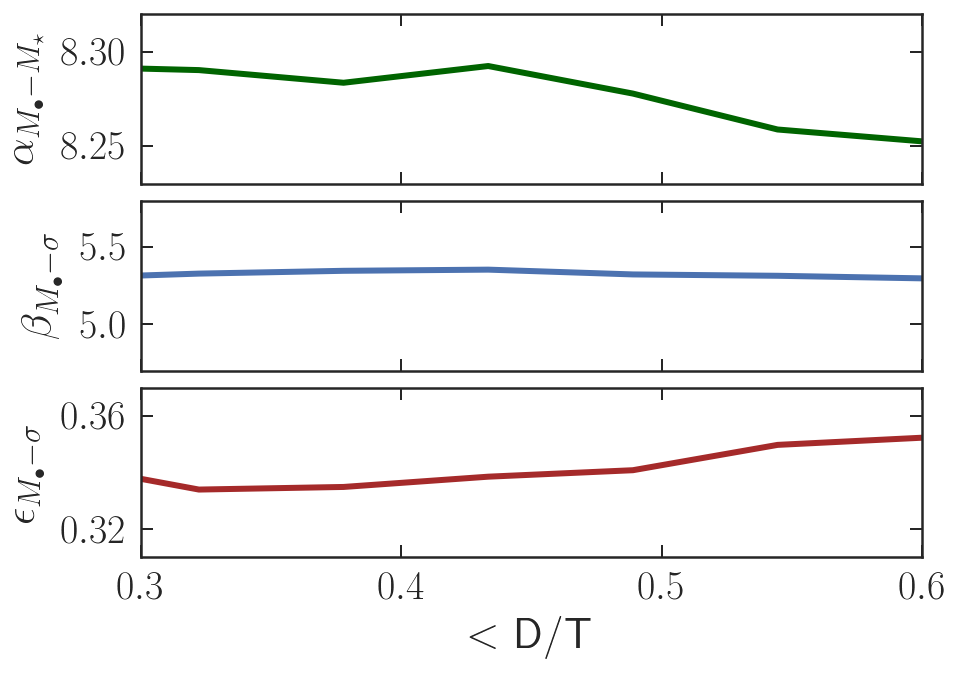

In [23]:
sns.set(style="white", color_codes=True, font_scale=2 )
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in"})

fig, axes = plt.subplots( 3, 1, figsize=(7,5) )
plt.subplots_adjust(hspace=0.1,wspace=0)

axes[0].plot( con_val, al_be_sc_mm[:,0], color='darkgreen', linewidth=line_w )
axes[0].set_ylim([8.23,8.32])

axes[1].plot( con_val, al_be_sc_ms[:,1], linewidth=line_w )
axes[1].set_ylim([4.7,5.8])
    
axes[2].plot( con_val, al_be_sc_ms[:,2], color='brown', linewidth=line_w )
axes[2].set_ylim([0.31,0.37])

axes[0].set_ylabel(r'$\alpha_{M_{\bullet}-M_{\star}}$')
axes[1].set_ylabel(r'$\beta_{M_{\bullet}-\sigma}$')
axes[2].set_ylabel(r'$\epsilon_{M_{\bullet}-\sigma}$')
axes[2].set_xlabel('$<$ D/T')

axes[0].tick_params( axis='x', which='both', labelbottom='off' )
axes[1].tick_params( axis='x', which='both', labelbottom='off' )
axes[0].set_yticks([8.25,8.3])    
axes[1].set_yticks([5,5.5])   
axes[2].set_yticks([0.32,0.36])   

for u in range(0,3):
    axes[u].set_xticks([0.3,0.4,0.5,0.6])
    axes[u].tick_params( which='both', top='on', right='on' )
    axes[u].set_xlim([0.3,0.6])

savefig('alphabeta_mmms_bulgedominated.eps', bbox_inches='tight', format='eps', dpi=2000)

# Eddington ratio

In [24]:
edd = bhacc/(bhmass*convert_edd_acc)
print('mean Edd ratio = %.2f' %np.mean(edd))

mean Edd ratio = 0.32


# Quantities distribution wrt 'distance' from the fit

In [25]:
def mean_std_q_ms(quantity, hmsigma, bhmass):
    predictbhmass = (10**b_main_ms)*hmsigma**a_main_ms 
    deltabhmass = np.log10(bhmass) - np.log10(predictbhmass)   # delta log10(Mbh)
    epsilon = get_intrinsic( np.log10(hmsigma), np.log10(bhmass), 200., a_main_ms , b_main_ms , 0.2 )[0]
    bins = np.linspace(min(deltabhmass), max(deltabhmass), 10)/epsilon
    inds = np.digitize(deltabhmass, bins)
    binw = bins[1]-bins[0]
    means = np.array([np.mean(quantity[inds==idx]) for idx in range(0,len(bins))])
    stds = np.array([np.std(quantity[inds==idx]) for idx in range(0,len(bins))])
    return bins, means, stds, epsilon

In [26]:
dbhms, eddmeans, eddstds, eddepsilon = mean_std_q_ms(edd, hmsigma, bhmass)

/home/kuanweih/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/kuanweih/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/kuanweih/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/kuanweih/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/kuanweih/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


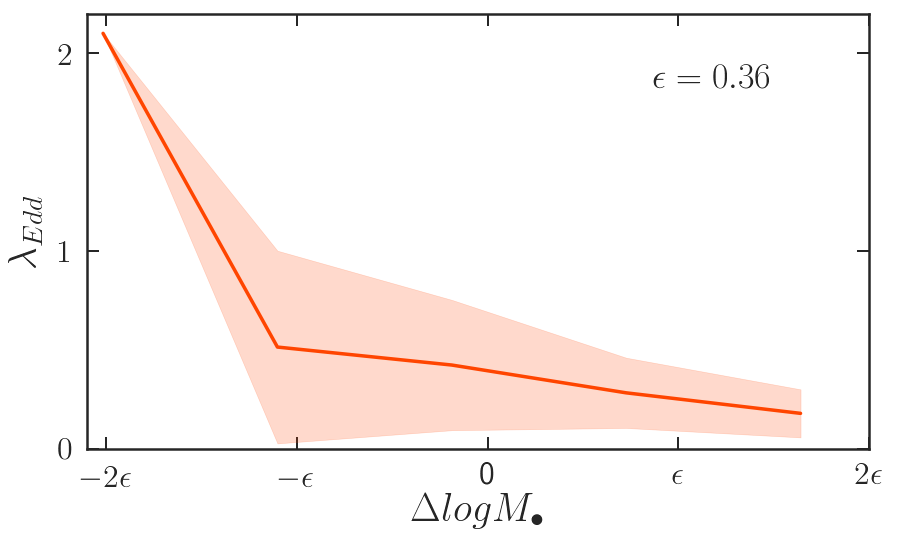

In [27]:
plot(dbhms, eddmeans, '-', color='orangered')
plt.fill_between(dbhms, eddmeans-eddstds, eddmeans+eddstds, alpha=0.2, color='orangered')
plt.xlabel(r'$\Delta logM_{\bullet}$', fontsize=labelfontsize)
plt.xticks([-2,-1,0,1,2], [r'$-2\epsilon$', r'$-\epsilon$', 0, r'$\epsilon$', r'$2\epsilon$'], fontsize=ticksize)
plt.ylabel(r'$\lambda_{Edd}$', fontsize=labelfontsize)
plt.yticks([0,1,2], fontsize=ticksize)
plt.xlim(-2.1,2)
plt.ylim(0,2.2)

plt.title(r'$\epsilon = %0.2f$' %eddepsilon, x=0.8, y=0.8, fontsize=titlefontsize)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off', labelleft='off')
plt.tick_params( which='major', top='on', right='on' )

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7, 4, forward=True)

savefig('Edd_BHmass_deviation.pdf', bbox_inches='tight', dpi=2000)

# Renew some plotting parameters

In [28]:
line_w=4.0
legsiz=23
cbfontsize=18
titlefontsize = 25
labelfontsize = 30
ticksize = 25
annotate = 25

# Fig 7 (top): MM relation 3 quantities 

/home/kuanweih/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/kuanweih/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log10


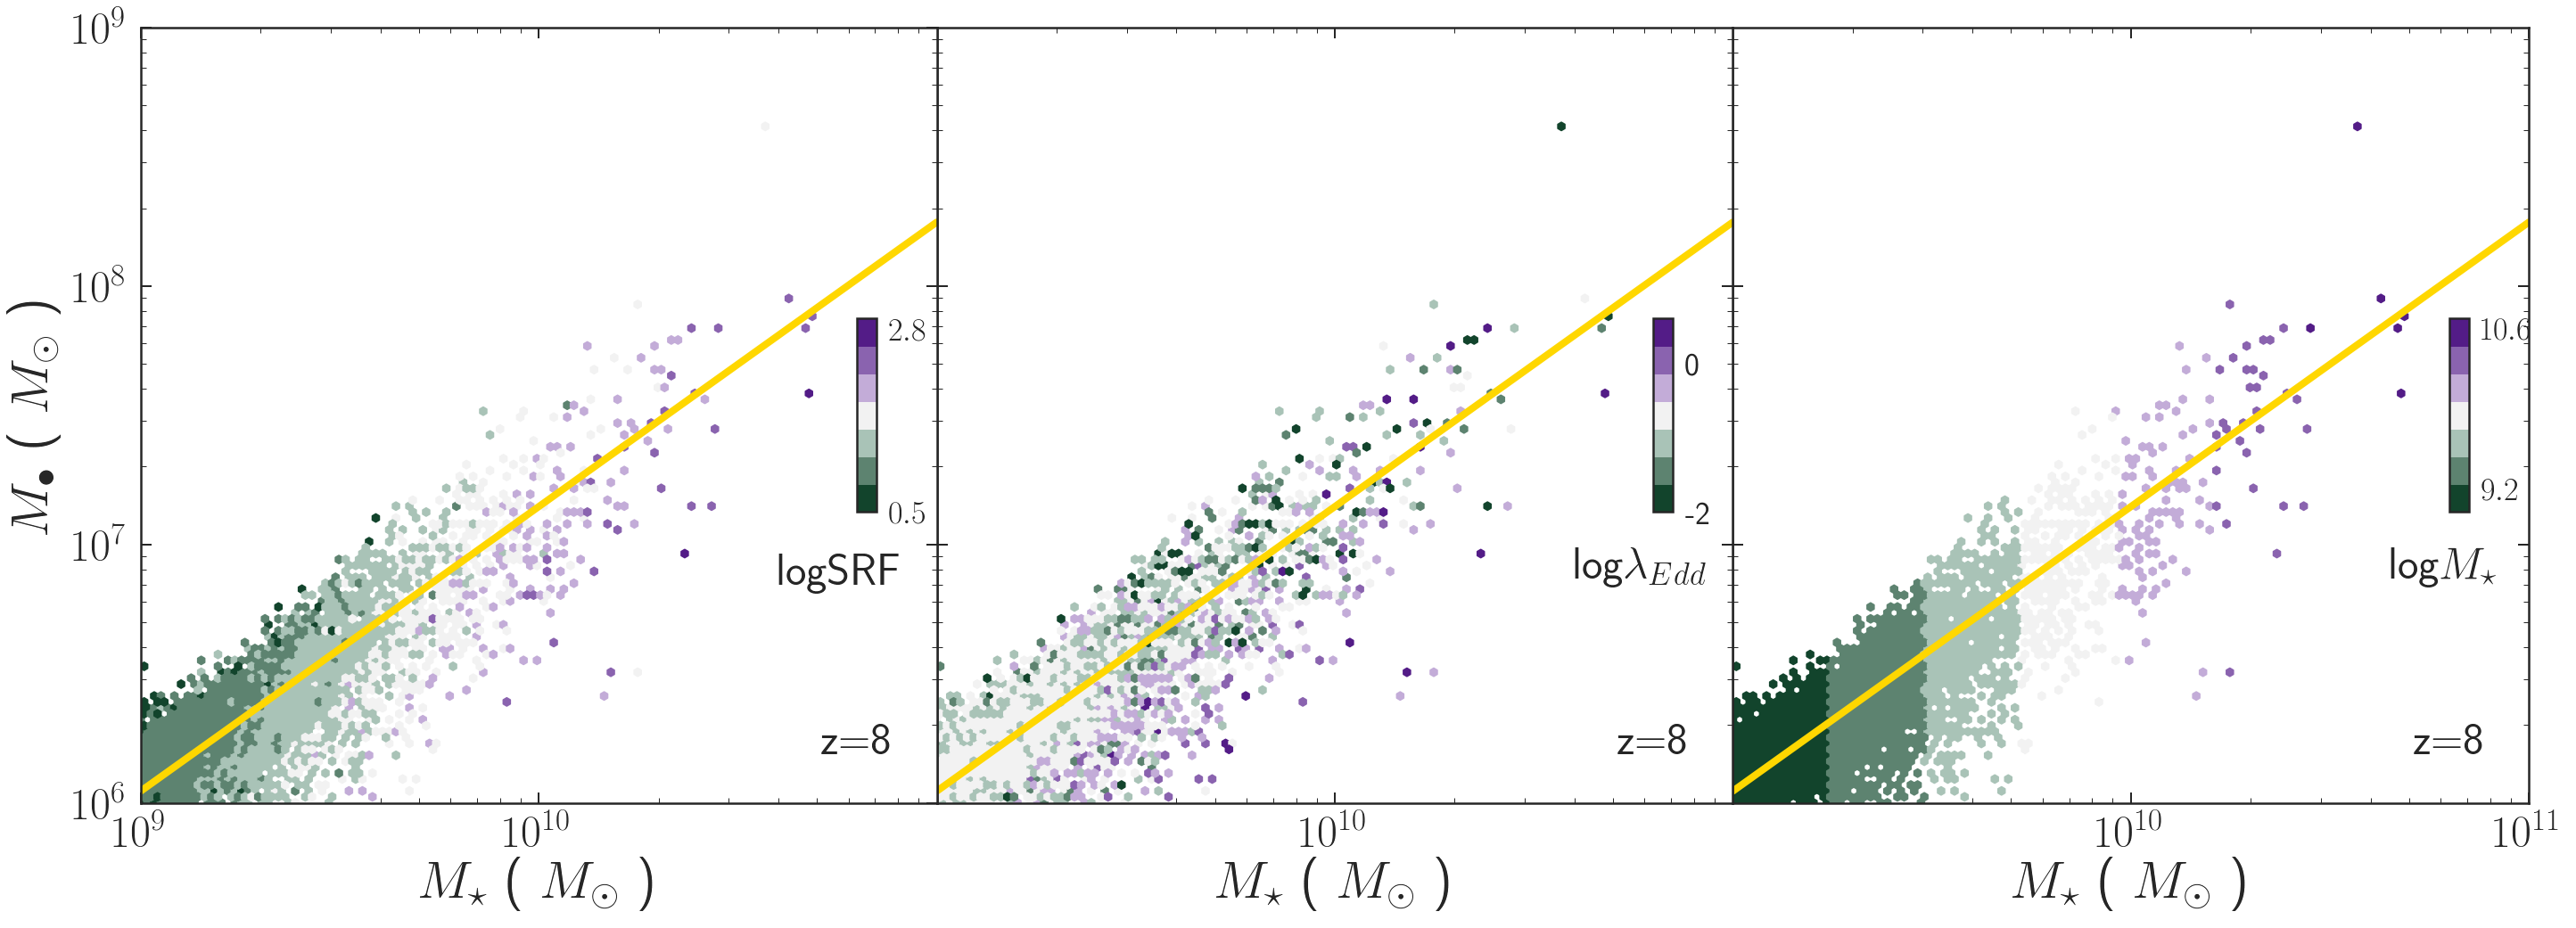

In [29]:
xaxmin = 1e9
xaxmax = 1e11
yaxmin = 1e6
yaxmax = 1e9

xx = np.logspace( np.log10(xaxmin), np.log10(xaxmax) )

gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1])

# Right Column
# --------------------------------------------------------------------------------
plt.subplot(gs[2])
plt.hexbin( stellarmass, bhmass, C=np.log10(stellarmass), cmap=my_cmap_mm, xscale='log', yscale='log', mincnt=0 )
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[9.2,10.6] )
cb.ax.tick_params(labelsize=cbfontsize)
plt.annotate( 'log$M_{\star}$',  xy=(4.5e10, 7e6), xytext=(4.5e10, 7e6), fontsize=annotate)
plt.xticks([1e10,1e11], fontsize=ticksize)
plt.yticks([1e7,1e8], fontsize=ticksize)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off')
plt.tick_params( which='major', top='on', right='on', labelleft='off' )
plt.xlabel( '$ M_{\star} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.title('z=8', fontsize=titlefontsize, x=0.9, y=0.05)
plot( xx, ( (10**b_main_mm)*xx**a_main_mm ), '-', color = gold_color, linewidth=line_w )
# --------------------------------------------------------------------------------

# Middle Column
# --------------------------------------------------------------------------------
plt.subplot(gs[1])
plt.hexbin( stellarmass, bhmass, C=np.log10(edd), cmap=my_cmap_mm, xscale='log', yscale='log', mincnt=0, vmin=-1.5 )
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[-1.5,0] )
cb.ax.set_yticklabels(['-2', '0'])
cb.ax.tick_params(labelsize=cbfontsize)
plt.annotate( 'log${\lambda}_{Edd}$',  xy=(4e10, 7e6), xytext=(4e10, 7e6), fontsize=annotate)
plt.xticks([1e10], fontsize=ticksize)
plt.yticks([1e7,1e8], fontsize=ticksize)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off')
plt.tick_params( which='major', top='on', right='on', labelleft='off' )
plt.xlabel( '$ M_{\star} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.title('z=8', fontsize=titlefontsize, x=0.9, y=0.05)
plot( xx, ( (10**b_main_mm)*xx**a_main_mm ), '-', color = gold_color, linewidth=line_w )
# --------------------------------------------------------------------------------

# Left Column
# --------------------------------------------------------------------------------
plt.subplot(gs[0])
plt.hexbin( stellarmass, bhmass, C=np.log10(sfr), cmap=my_cmap_mm, xscale='log', yscale='log', mincnt=0, vmin=0.5 )
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[0.5,2.8] )
cb.ax.tick_params(labelsize=cbfontsize)
plt.annotate( 'logSRF',  xy=(4e10, 7e6), xytext=(4e10, 7e6), fontsize=annotate)
plt.xticks([1e9,1e10], fontsize=ticksize)
plt.yticks([1e6,1e7,1e8,1e9], fontsize=ticksize)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off' )
plt.tick_params( which='major', top='on', right='on' )
plt.xlabel( '$ M_{\star} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.ylabel( r'$ M_{\bullet} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.title('z=8', fontsize=titlefontsize, x=0.9, y=0.05)
plot( xx, ( (10**b_main_mm)*xx**a_main_mm ), '-', color = gold_color, linewidth=line_w )
# --------------------------------------------------------------------------------

plt.subplots_adjust(hspace=0,wspace=0)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(24, 8, forward=True)

savefig('BHM_STM_3quantity.eps', bbox_inches='tight', format='eps', dpi=2000)

# Fig 7 (middle): Msigma 3 quantities 

/home/kuanweih/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/home/kuanweih/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log10


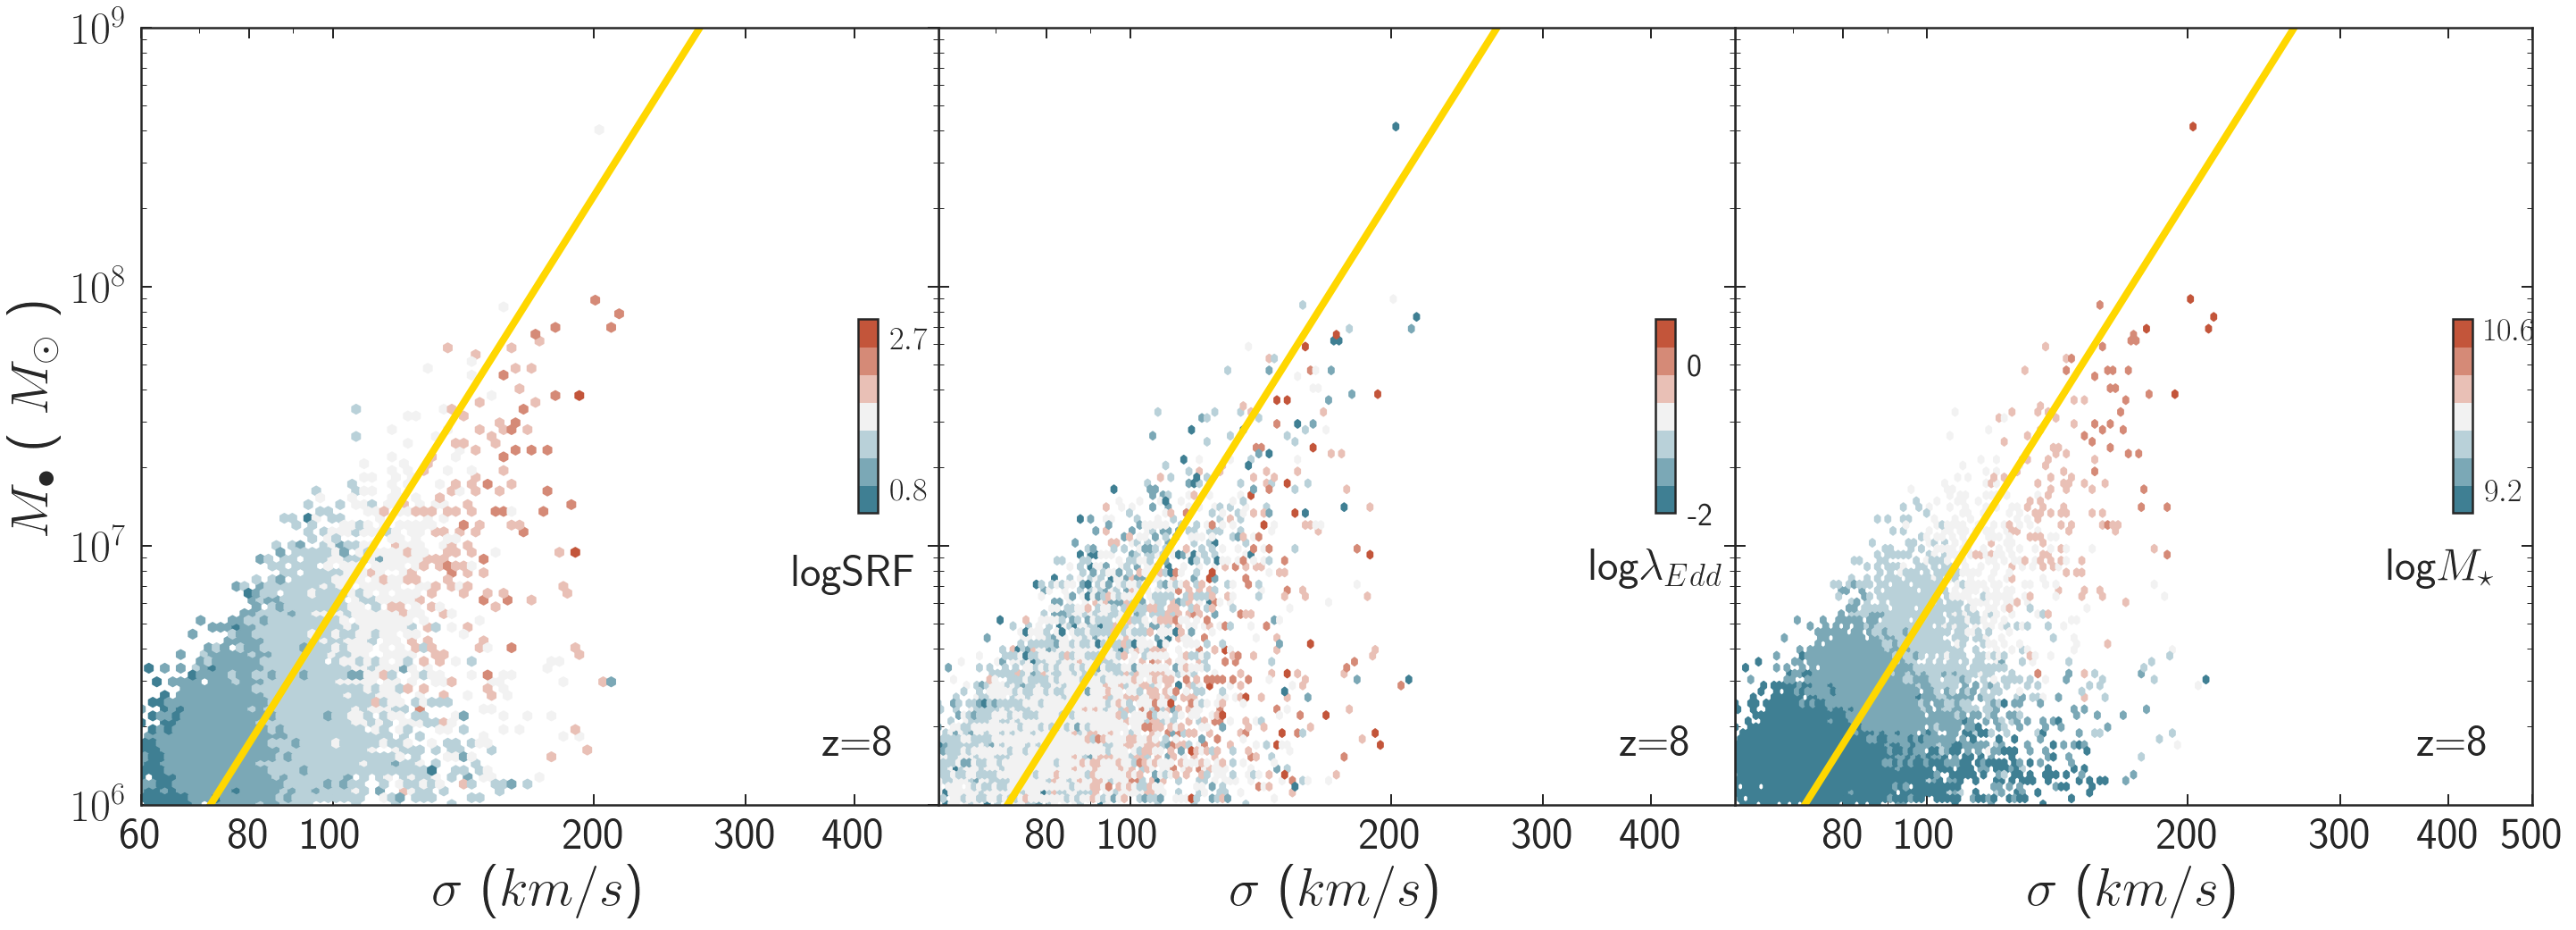

In [30]:
xaxmin = 60
xaxmax = 500
yaxmin = 1e6
yaxmax = 1e9

xx = np.logspace( np.log10(xaxmin), np.log10(xaxmax) )

gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1])

# Right Column
# --------------------------------------------------------------------------------
plt.subplot(gs[2])
ax0=plt.hexbin( hmsigma, bhmass, C=np.log10(stellarmass), cmap=my_cmap_ms, xscale='log', yscale='log', mincnt=0 )
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[9.2,10.6] )
cb.ax.tick_params(labelsize=cbfontsize)
plt.annotate( 'log$M_{\star}$',  xy=(340, 7e6), xytext=(340, 7e6), fontsize=annotate)
plt.xticks([80,100,200,300,400,500],[80,100,200,300,400,500], fontsize=ticksize)
plt.yticks([1e7,1e8], fontsize=ticksize)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off')
plt.tick_params( which='major', top='on', right='on', labelleft='off' )
plt.xlabel( '$\sigma$ ($km/s$)', fontsize=labelfontsize )
plt.title('z=8', fontsize=titlefontsize, x=0.9, y=0.05)
plot( xx, ( (10**b_main_ms)*xx**a_main_ms ), '-', color = gold_color, linewidth=line_w )
# --------------------------------------------------------------------------------

# Middle Column
# --------------------------------------------------------------------------------
plt.subplot(gs[1])
ax0=plt.hexbin( hmsigma, bhmass, C=np.log10(edd), cmap=my_cmap_ms, xscale='log', yscale='log', mincnt=0, vmin=-1.5 )
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[-1.5,0] )
cb.ax.set_yticklabels(['-2', '0'])
cb.ax.tick_params(labelsize=cbfontsize)
plt.annotate( 'log${\lambda}_{Edd}$',  xy=(340, 7e6), xytext=(340, 7e6), fontsize=annotate)
plt.xticks([80,100,200,300,400],[80,100,200,300,400], fontsize=ticksize)
plt.yticks([1e7,1e8], fontsize=ticksize)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off')
plt.tick_params( which='major', top='on', right='on', labelleft='off' )
plt.xlabel( '$\sigma$ ($km/s$)', fontsize=labelfontsize )
plt.title('z=8', fontsize=titlefontsize, x=0.9, y=0.05)
plot( xx, ( (10**b_main_ms)*xx**a_main_ms ), '-', color = gold_color, linewidth=line_w )
# --------------------------------------------------------------------------------

# Left Column
# --------------------------------------------------------------------------------
plt.subplot(gs[0])
ax0=plt.hexbin( hmsigma, bhmass, C=np.log10(sfr), cmap=my_cmap_ms, xscale='log', yscale='log', extent=[ np.log10(xaxmin), np.log10(xaxmax), np.log10(yaxmin), np.log10(yaxmax) ], mincnt=0, vmin=0.5 )
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[0.8,2.7] )
cb.ax.tick_params(labelsize=cbfontsize)
plt.annotate( 'logSRF',  xy=(340, 7e6), xytext=(340, 7e6), fontsize=annotate)
plt.xticks([60,80,100,200,300,400],[60,80,100,200,300,400], fontsize=ticksize)
plt.yticks([1e6,1e7,1e8,1e9], fontsize=ticksize)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off')
plt.tick_params( which='major', top='on', right='on' )
plt.xlabel( '$\sigma$ ($km/s$)', fontsize=labelfontsize )
plt.ylabel( r'$ M_{\bullet} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.title('z=8', fontsize=titlefontsize, x=0.9, y=0.05)
plot( xx, ( (10**b_main_ms)*xx**a_main_ms ), '-', color = gold_color, linewidth=line_w )
# --------------------------------------------------------------------------------

plt.subplots_adjust(hspace=0,wspace=0)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(24, 8, forward=True)

savefig('MSigma_3quantity.eps', bbox_inches='tight', format='eps', dpi=2000)

# Fit scaling relations with SFR, Edd, Mstar thresholds

In [31]:
SFR_val = linspace(  0,  2, n_thr )
Edd_val = linspace( -2,  0, n_thr )
BSM_val = linspace(  9, 10, n_thr )
con_val = np.array([SFR_val,Edd_val,BSM_val])

thre_3_arr = [sfr, edd, stellarmass]

In [32]:
al_be_sc_mm = np.array([get_fit_coeff( thre_3_arr[v], 10**con_val[v,u], 1, np.log10(stellarmass), np.log10(bhmass), 1e11 )
              for v in range(0,3)  for u in range(0,n_thr)]).reshape((3, n_thr, 3))
al_be_sc_ms = np.array([get_fit_coeff( thre_3_arr[v], 10**con_val[v,u], 1, np.log10(hmsigma), np.log10(bhmass), 200. )
              for v in range(0,3)  for u in range(0,n_thr)]).reshape((3, n_thr, 3))

# Fig 7 (bottom): alpha, beta, epsilon

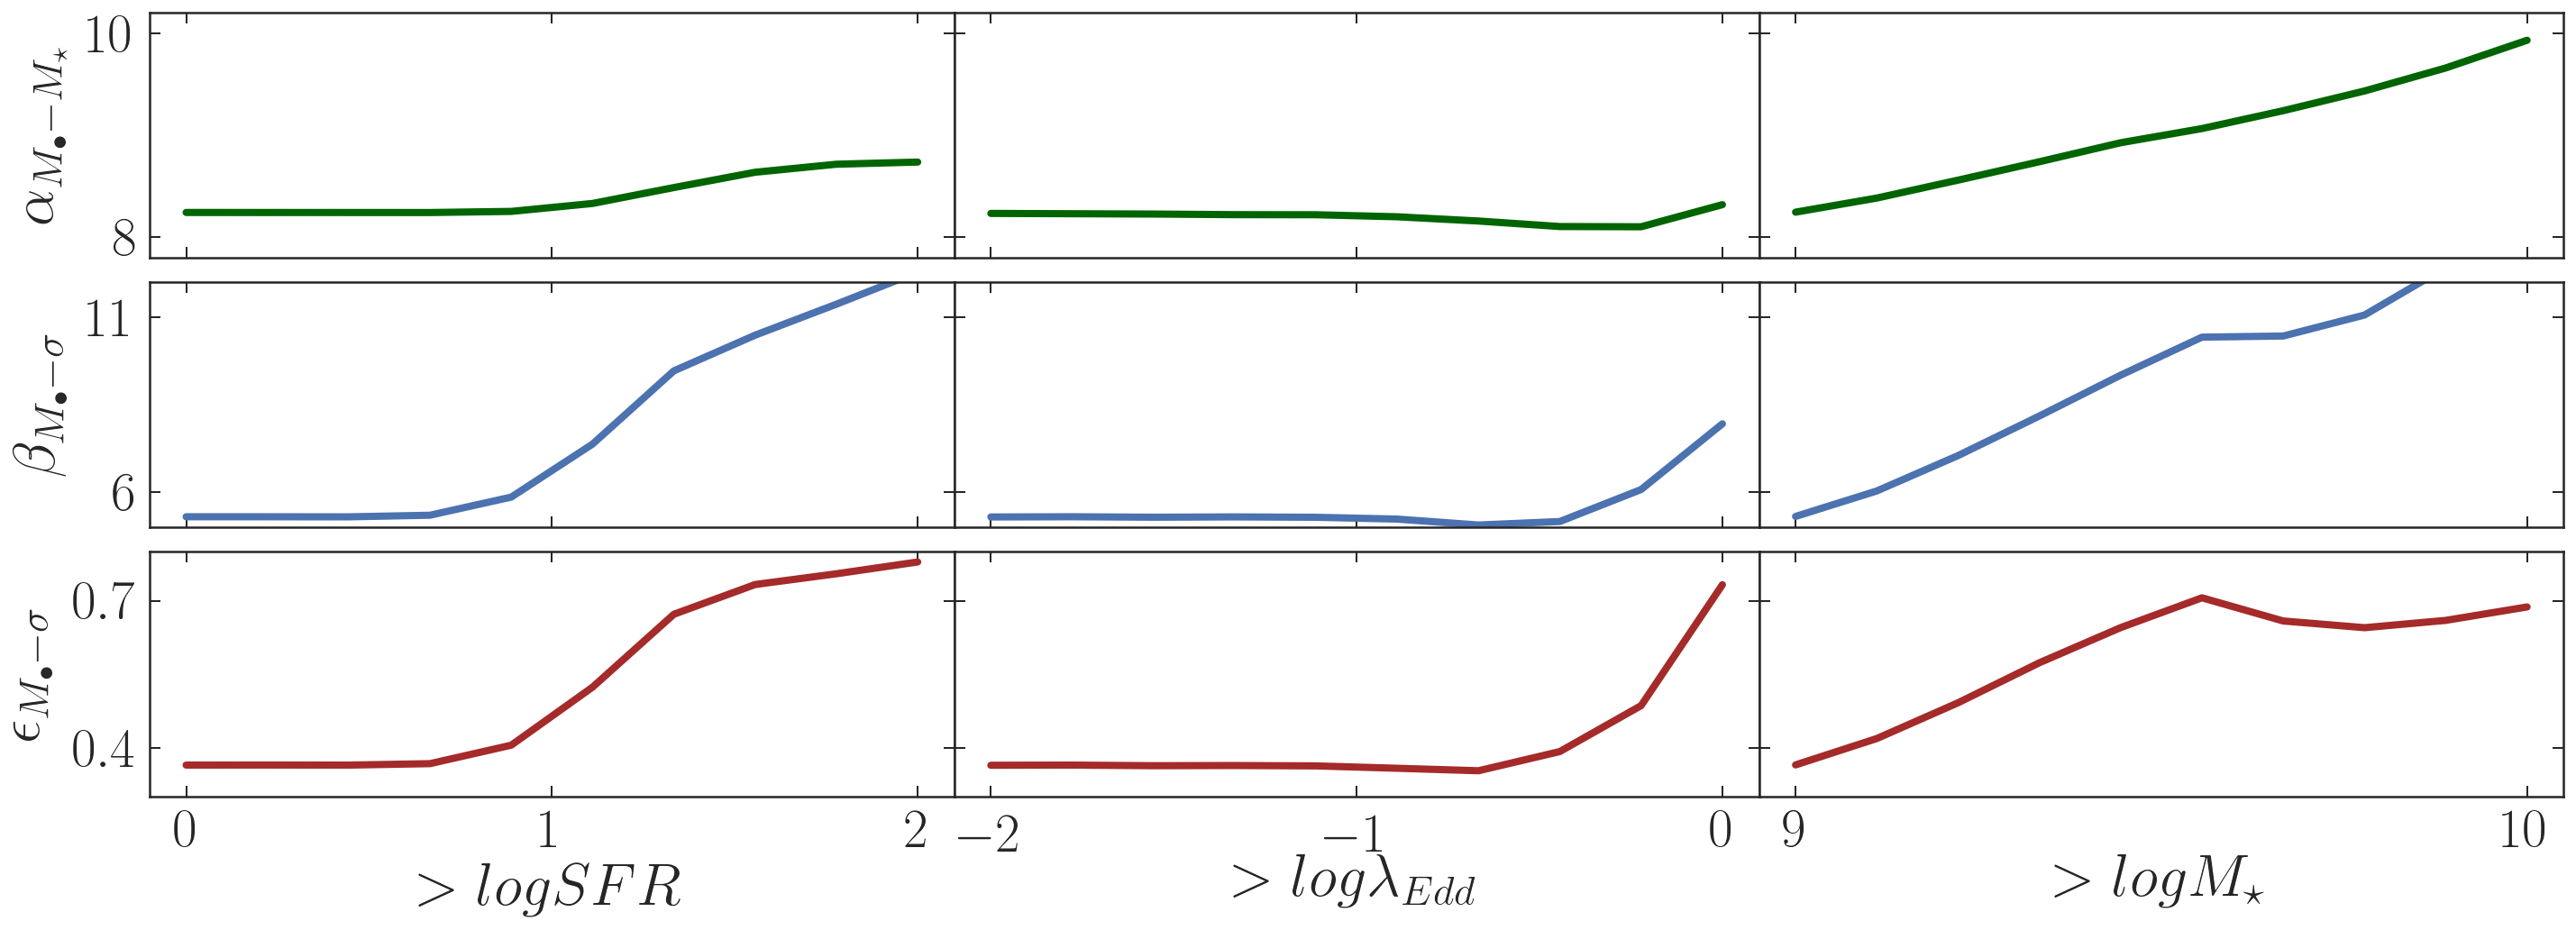

In [33]:
sns.set(style="white", color_codes=True, font_scale=3 )
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in"})

fig, axes = plt.subplots( 3, 3, figsize=(24,8) )
plt.subplots_adjust(hspace=0.1,wspace=0)

for v in range(0,3):
    v = 2-v

    axes[0,v].plot( con_val[v], al_be_sc_mm[v,:,0], color='darkgreen', linewidth=line_w )
    axes[0,v].set_ylim([7.8,10.2])

    axes[1,v].plot( con_val[v], al_be_sc_ms[v,:,1], linewidth=line_w )
    axes[1,v].set_ylim([5,12])
    
    axes[2,v].plot( con_val[v], al_be_sc_ms[v,:,2], color='brown', linewidth=line_w )
    axes[2,v].set_ylim([0.3,0.8])

axes[0,0].set_ylabel(r'$\alpha_{M_{\bullet}-M_{\star}}$')
axes[1,0].set_ylabel(r'$\beta_{M_{\bullet}-\sigma}$')
axes[2,0].set_ylabel(r'$\epsilon_{M_{\bullet}-\sigma}$')

axes[2,0].set_xlabel(r'$>logSFR$')
axes[2,1].set_xlabel(r'$>log\lambda_{Edd}$')
axes[2,2].set_xlabel(r'$>logM_{\star}$')

for u in range(0,3):
    axes[u,0].set_xticks([0,1,2])
    axes[u,1].set_xticks([-2,-1,0])
    axes[u,2].set_xticks([9,10])

for v in range(1,3):
    for u in range(0,3):
        axes[u,v].tick_params( axis='y', which='both', labelleft='off' )
    
for v in range(0,3):
    axes[0,v].tick_params( axis='x', which='both', labelbottom='off' )
    axes[1,v].tick_params( axis='x', which='both', labelbottom='off' )
    axes[0,v].set_yticks([8,10])    
    axes[1,v].set_yticks([6,11])   
    axes[2,v].set_yticks([0.4,0.7])   

    for u in range(0,3):
        axes[u,v].tick_params( which='both', top='on', right='on' )

savefig('alphabeta_mmms.eps', bbox_inches='tight', format='eps', dpi=2000)

# gas to star mass ratio: f

In [34]:
fgasstar = gasmass/stellarmass

In [35]:
con = (fgasstar>0)*(bhacc>0)
stellarmass = stellarmass[con]
bhmass = bhmass[con]
hmsigma = hmsigma[con]
dtot = dtot[con]
bhacc = bhacc[con]
gasmass = gasmass[con]
sfr = sfr[con]
fgasstar = fgasstar[con]

print('%d galaxies' %len(stellarmass))

8112 galaxies


# Renew some plotting parameters

In [36]:
line_w=3.0
cbfontsize=16
titlefontsize = 18
labelfontsize = 20
ticksize = 16
legsiz = 16
annotate = 18

# Fig 9 (top): f vs BH mass

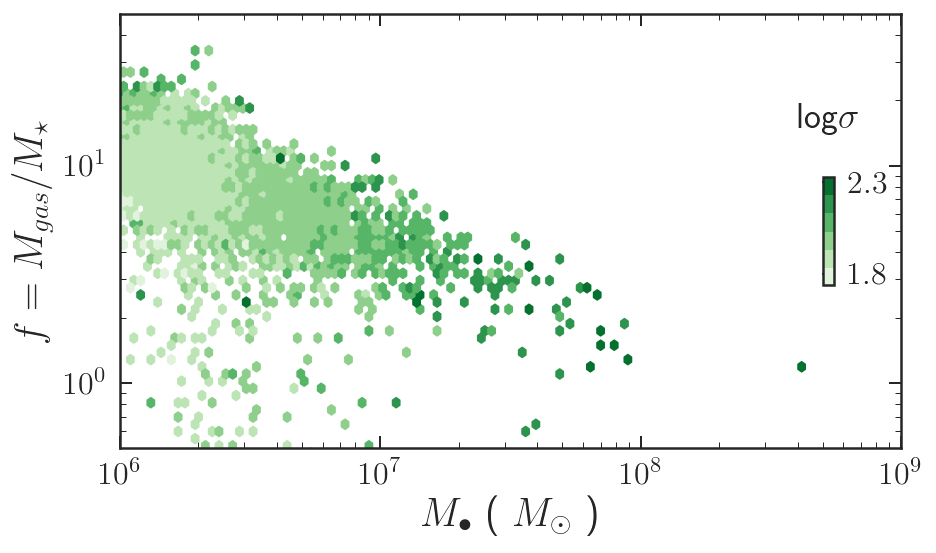

In [37]:
xaxmin = 1e6
xaxmax = 1e9
yaxmin = 1e-1
yaxmax = 1e2

hexbin( bhmass, fgasstar, C=np.log10(hmsigma), xscale='log', yscale='log', cmap=my_cmap_greens)
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[1.8,2.3] )
cb.ax.tick_params(labelsize=cbfontsize)
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])
plt.xticks([1e6,1e7,1e8,1e9], fontsize=ticksize)
plt.yticks([1e0,1e1,1e2], fontsize=ticksize)
plt.ylim([5e-1,5e1])
plt.tick_params( which='minor', top='on', right='on', labelbottom='off')
plt.tick_params( which='major', top='on', right='on' )
plt.xlabel( r'$ M_{\bullet} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.ylabel( '$f=M_{gas}/M_{\star}$', fontsize=labelfontsize )
plt.annotate( 'log$\sigma$',  xy=(4e8, 15), xytext=(4e8, 15), fontsize=annotate)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7, 4, forward=True)

savefig('gas_star_fraction1.eps', bbox_inches='tight', dpi=2000)

# Fig 9 (middle): f vs sigma

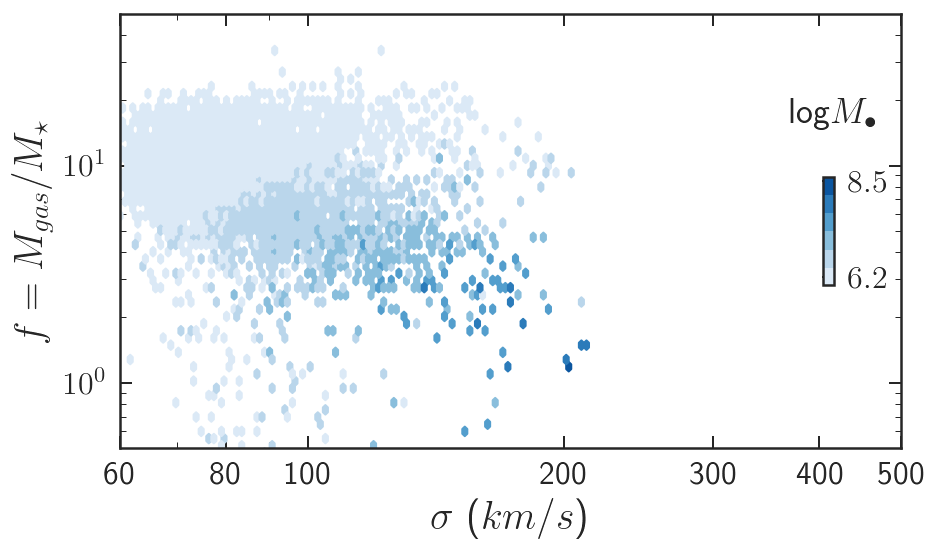

In [38]:
xaxmin = 60
xaxmax = 500
yaxmin = 1e-1
yaxmax = 1e2

hexbin( hmsigma, fgasstar, C=np.log10(bhmass), xscale='log', yscale='log', cmap=my_cmap_blues ) 
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[6.2,8.5] )
cb.ax.tick_params(labelsize=cbfontsize)
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])
plt.xticks([60,80,100,200,300,400,500],[60,80,100,200,300,400,500], fontsize=ticksize)
plt.yticks([1e0,1e1,1e2], fontsize=ticksize)
plt.ylim([5e-1,5e1])
plt.tick_params( which='minor', top='on', right='on', labelbottom='off')
plt.tick_params( which='both', top='on', right='on' )
plt.xlabel( '$\sigma$ ($km/s$)', fontsize=labelfontsize )
plt.ylabel( '$f=M_{gas}/M_{\star}$', fontsize=labelfontsize )
# plt.title(r'$logM_{\bullet}$'+'\n\n\n\n\n\n\n', fontsize=titlefontsize, x=0.9, y=0.05)
plt.annotate( r'log$M_{\bullet}$',  xy=(370, 15), xytext=(370, 15), fontsize=annotate)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7, 4, forward=True)

savefig('gas_star_fraction2.eps', bbox_inches='tight', dpi=2000)

# Fit and select galaxies with f<10

In [39]:
f_val = 10.
al_be_sc_ms = np.array([get_fit_coeff( fgasstar, f_val, 0, np.log10(hmsigma), np.log10(bhmass), 200. )])[0]
a_f = al_be_sc_ms[1]
b_f = al_be_sc_ms[0]-al_be_sc_ms[1]*np.log10(200.)

In [40]:
con = fgasstar<f_val
bhmass_f = bhmass[con]
hmsigma_f = hmsigma[con]
fgasstar_f = fgasstar[con]

print('%d galaxies' %len(hmsigma_f))

4939 galaxies


# Fig 8 (top and middle): Msigma with limiting f

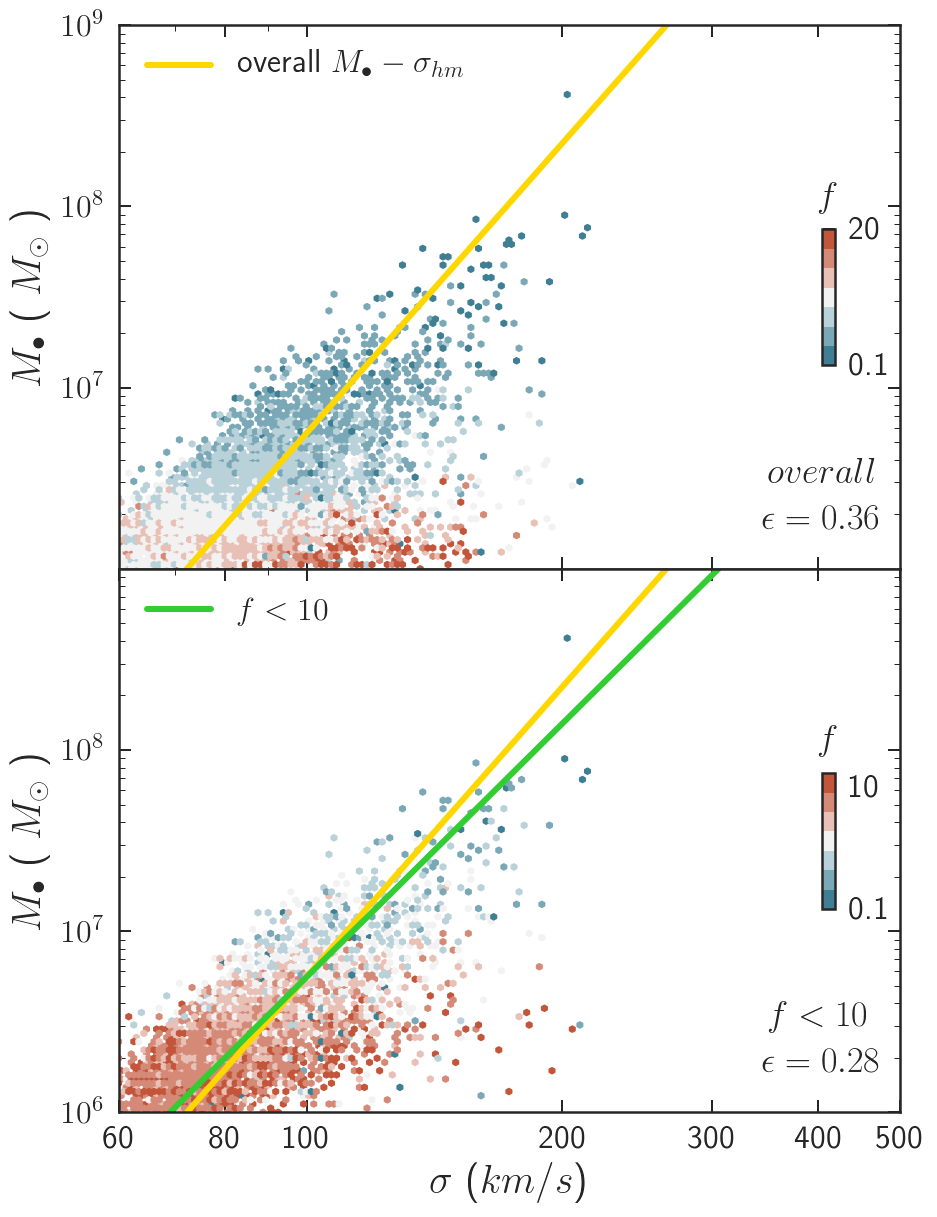

In [41]:
xaxmin = 60
xaxmax = 500
yaxmin = 1e6
yaxmax = 1e9

xx = np.logspace( np.log10(xaxmin), np.log10(xaxmax) )

gs = gridspec.GridSpec(2, 1, height_ratios=[1,1])

# Top
# --------------------------------------------------------------------------------
plt.subplot(gs[0])
plt.hexbin( hmsigma, bhmass, C=fgasstar, cmap=my_cmap_ms, xscale='log', yscale='log', mincnt=0, vmin=0.1, vmax=20 )
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[0.1,20] )
cb.ax.set_yticklabels(['0.1', '20'])
cb.ax.tick_params(labelsize=cbfontsize)
plt.annotate( r'$f$',  xy=(400, 1e8), xytext=(400, 1e8), fontsize=annotate)
plt.xticks([80,100,200,300,400],[80,100,200,300,400], fontsize=ticksize)
plt.yticks([1e7,1e8,1e9], fontsize=ticksize)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off')
plt.tick_params( which='major', top='on', right='on', labelbottom='off' )
plt.ylabel( r'$ M_{\bullet} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.title(r'$\epsilon=0.36$', fontsize=titlefontsize, x=0.9, y=0.05)
plt.annotate( '$overall$',  xy=(350, 3e6), xytext=(350, 3e6), fontsize=annotate)
plot( xx, ( (10**b_main_ms)*xx**a_main_ms ), '-', color = gold_color, linewidth=line_w, label=r'overall $M_{\bullet}-\sigma_{hm}$' )
plt.legend( loc=2, prop={'size':legsiz }, frameon=False )
# --------------------------------------------------------------------------------


# Bottom
# --------------------------------------------------------------------------------
plt.subplot(gs[1])
plt.hexbin( hmsigma_f, bhmass_f, C=fgasstar_f, cmap=my_cmap_ms, xscale='log', yscale='log', mincnt=0, vmin=0.1, vmax=10 )
plt.axis([ xaxmin, xaxmax, yaxmin, yaxmax ])
cb = plt.colorbar( aspect=10, fraction=0.1, pad=-0.1, shrink=0.25, ticks=[0.1,9.] )
cb.ax.set_yticklabels(['0.1', '10'])
cb.ax.tick_params(labelsize=cbfontsize)
plt.annotate( r'$f$',  xy=(400, 1e8), xytext=(400, 1e8), fontsize=annotate)
plt.xticks([60,80,100,200,300,400,500],[60,80,100,200,300,400,500], fontsize=ticksize)
plt.yticks([1e6,1e7,1e8], fontsize=ticksize)
plt.tick_params( which='minor', top='on', right='on', labelbottom='off')
plt.tick_params( which='major', top='on', right='on' )
plt.xlabel( '$\sigma$ ($km/s$)', fontsize=labelfontsize )
plt.ylabel( r'$ M_{\bullet} $ ( $M_{\odot} $ )', fontsize=labelfontsize )
plt.title('$\epsilon=0.28$', fontsize=titlefontsize, x=0.9, y=0.05)
plt.annotate( '$f<10$',  xy=(350, 3e6), xytext=(350, 3e6), fontsize=annotate)
plot( xx, ( (10**b_main_ms)*xx**a_main_ms ), '-', color = gold_color, linewidth=line_w )
plot( xx, ( (10**b_f)*xx**a_f ), '-', color = green_color, linewidth=line_w, label=r'$f<10$' )
plt.legend( loc=2, prop={'size':legsiz }, frameon=False )
# --------------------------------------------------------------------------------

plt.subplots_adjust(hspace=0,wspace=0)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7, 10, forward=True)

savefig('MSigma_f.eps', bbox_inches='tight', dpi=2000)

# Fit Msigma with limiting f

In [42]:
f_val = linspace( 10, 25, n_thr )
al_be_sc_ms = np.array([get_fit_coeff( fgasstar, f_val[u], 0, np.log10(hmsigma), 
                        np.log10(bhmass), 200. )  for u in range(0,n_thr)])

# Fig 8 (bottom): beta and epsilon

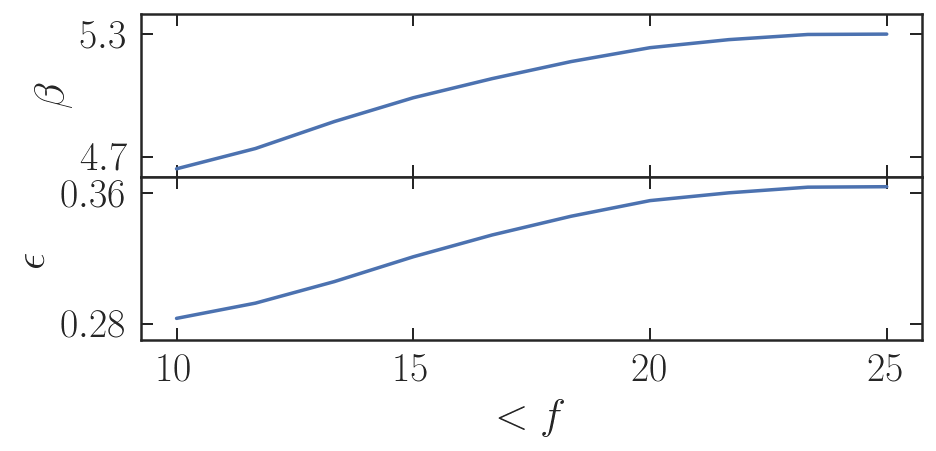

In [43]:
sns.set(style="white", color_codes=True, font_scale=2 )
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in"})
fig, axes = plt.subplots( 2, 1, figsize=(7,3) )
plt.subplots_adjust(hspace=0)

axes[0].plot( f_val, al_be_sc_ms[:,1] )
axes[0].set_ylim([4.6,5.4])

axes[1].plot( f_val, al_be_sc_ms[:,2] )
axes[1].set_ylim([0.27,0.37])

for v in range(0,2):
#     axes[v].set_xlim([10,25])
    axes[v].set_xticks([10,15,20,25])

axes[0].set_ylabel(r'$\beta$')
axes[1].set_ylabel(r'$\epsilon$')
axes[1].set_xlabel(r'$<f$')

axes[0].set_yticks([4.7,5.3])
axes[1].set_yticks([0.28,0.36])
axes[0].tick_params( which='both', top='on', right='on', labelbottom='off')
axes[1].tick_params( which='major', top='on', right='on' )

savefig('beta_epsilon_f.eps', bbox_inches='tight', dpi=2000)